## Getting started with SimFrame

This notebook will show how to set up SimFrame, load in a `MasterLattice` object and settings for tracking, and show how to plot the results.

It is assumed that the [MasterLattice](https://gitlab.stfc.ac.uk/jkj62/masterlattice/) and [SimCodes](https://gitlab.stfc.ac.uk/jkj62/simcodes/) repositories have been cloned, and that they are accessible at the same directory level as SimFrame. Alternatively, these can be installed via `setup.py` in their respective directories, in which case they do not have to be provided on instantiation.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../../")
import SimulationFramework.Framework as fw  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402
import SimulationFramework.Modules.Beams as rbf  # noqa E402
import SimulationFramework.Modules.Twiss as rtf  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        master_lattice='../../../masterlattice/MasterLattice/',
        simcodes='../../../simcodes/SimCodes',
        directory="./getting_started",
        clean=False,
        verbose=False
    )

scaling = 4

initializing ocelot...


### Preparing the simulation and tracking

Load a lattice definition file. These can be found in `Masterlattice/Lattices` by default.

In [5]:
framework.loadSettings("Lattices/clara400_v13_SP3.def")
startline = "generator"
endline = "S06"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [3]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [4]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [5]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [6]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [7]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [8]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090)

Generate and track the bunch 

In [9]:
framework.track(startfile=startline, endfile=endline)

/home/xkc85723/Documents/simframe/examples/notebooks/../../SimulationFramework/Modules/Beams/Particles/__init__.py:904: UserWarning: Both beta and alpha must be provided to rematch
  warnings.warn("Both beta and alpha must be provided to rematch")
/home/xkc85723/Documents/simframe/examples/notebooks/../../SimulationFramework/Modules/Beams/Particles/__init__.py:935: UserWarning: Both beta and alpha must be provided to rematch
  warnings.warn("Both beta and alpha must be provided to rematch")


In [6]:
fwdir = load_directory("./getting_started", framework=framework)

TypeError: 'cavity' object is not a mapping

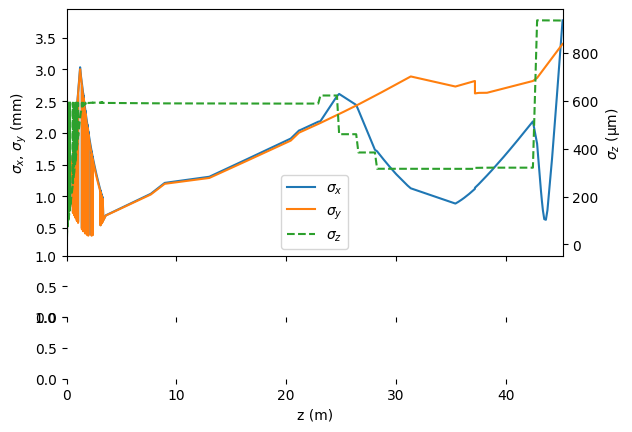

In [7]:
plt1, fig1, ax1 = fwdir.plot(include_layout=True, include_particles=False, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])

In [4]:
from SimulationFramework.Modules.plotting.plotting import load_elements

In [8]:
load_elements(framework, bounds=None, sections="All", verbose=True, types=["cavity", "solenoid"])

TypeError: 'cavity' object is not a mapping

In [9]:
framework.getElementType("cavity")

TypeError: 'cavity' object is not a mapping

In [14]:
param = None
typ = "cavity"
[
            (
                {"name": element, **framework.elementObjects[element]}
                if param is None
                else framework.elementObjects[element][param]
            )
            for element in list(framework.elementObjects.keys())
            if framework.elementObjects[element].objecttype.lower() == typ.lower()
        ]

SyntaxError: ':' expected after dictionary key (46206012.py, line 5)

In [13]:
[framework.elementObjects[element] for element in list(framework.elementObjects.keys()) if framework.elementObjects[element].objecttype.lower() == typ.lower()]

[{'field_amplitude': 120000000.0, 'length': 0.32, 'objecttype': 'cavity', 'sub_elements': {'EBT-HRG1-MAG-SOL-01': {'centre': [0.0, 0.0, 0.16241], 'datum': [0.0, 0.0, 0.32], 'field_amplitude': 0.345, 'field_definition': '$master_lattice_location$Data_Files/HRRG_combined_sols_100mm_onaxis.hdf5', 'field_reference_position': 'start', 'global_rotation': [0, 0, 0], 'length': 0.32, 'type': 'solenoid'}}, 'field_reference_position': 'start', 'lsc_cutoff_high': [0, 0], 'n_cells': 1.5, 'frequency': 2998500000.0, 'crest': 145.789, 'global_rotation': [0.0, 0.0, 0.0], 'Structure_Type': 'StandingWave', 'type': 'cavity', 'phase': 9, 'datum': [0.0, 0.0, 0.32], 'field_definition': field(x=FieldParameter(name='x', value=None), y=FieldParameter(name='y', value=None), z=FieldParameter(name='z', value=array([0.0000000e+00, 1.2489592e-04, 2.4979183e-04, ..., 1.4975020e-01,
        1.4987509e-01, 1.5000000e-01], units='m')), r=FieldParameter(name='r', value=None), t=FieldParameter(name='t', value=None), Ex=Fi